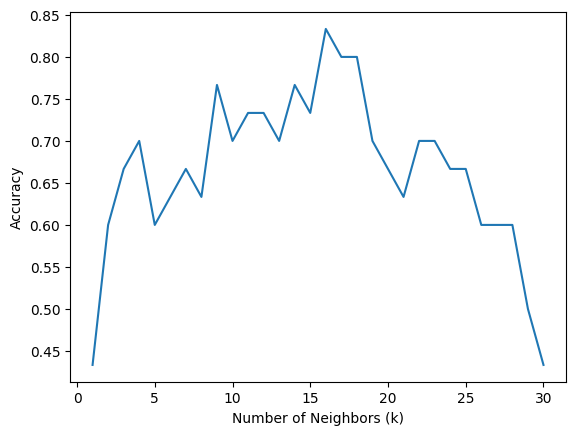

Accuracy: 0.8333333333333334
Test accuracy: 0.83333
Хорошая работа!
              precision    recall  f1-score   support

           0       0.89      0.73      0.80        11
           1       0.78      0.88      0.82         8
           2       0.83      0.91      0.87        11

    accuracy                           0.83        30
   macro avg       0.83      0.84      0.83        30
weighted avg       0.84      0.83      0.83        30



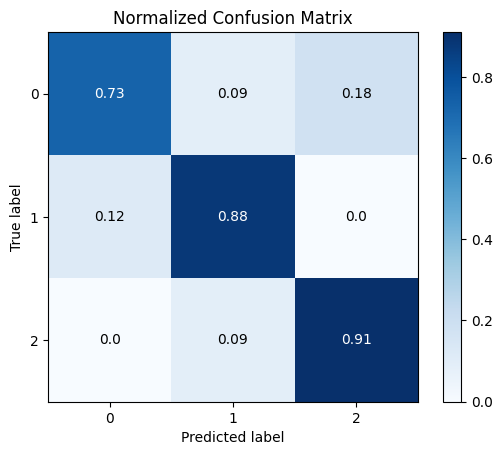

In [1]:
import scikitplot as skplt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

hard_problem = datasets.make_classification(
    n_samples=100,
    n_features=100,
    n_informative=50,
    n_classes=3,
    n_redundant=50,
    n_clusters_per_class=1,
    random_state=42,
)

X_train, X_test, y_train, y_test = train_test_split(
    *hard_problem,
    test_size=0.3,
    random_state=1,
)

clf = KNeighborsClassifier(n_neighbors=8)
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
accuracy_score(y_test, predictions)

# Ваш код для поиска оптимального значения k
acc_scores = []
k_range = range(1, 31) # Перебираем возможные значения k от 1 до 30

for k in k_range:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc_scores.append(accuracy_score(y_test, y_pred))

# Ваш код для построения графика зависимости accuracy(k) - метрики accuracy в зависимости от числа k
best_k_val = k_range[np.argmax(acc_scores)] # Найти наилучшее k и соответствующую точность accuracy
plt.plot(k_range, acc_scores)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.show()

k_optim = best_k_val

clf = KNeighborsClassifier(n_neighbors=k_optim)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Test accuracy: %.5f" % accuracy)
assert accuracy > 0.8, "попробуйте изменить следующие параметры: penalty, solver"

print('Хорошая работа!')

skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)

print(classification_report(y_test, y_pred))